In [7]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [24]:
df_price       = pd.read_csv('../inputs/price_sales_promotion.csv')
df_demo        = pd.read_csv('../inputs/demographics.csv')
df_ind_sales   = pd.read_csv('../inputs/industry_soda_sales.csv')
df_ind_volume  = pd.read_csv('../inputs/industry_volume.csv')
df_hist_volume = pd.read_csv('../inputs/historical_volume.csv')
df_calendar    = pd.read_csv('../inputs/event_calendar.csv')
df_weather     = pd.read_csv('../inputs/weather.csv')

In [3]:
df_price.head(5)

,Agency,SKU,YearMonth,Price,Sales,Promotions
0,Agency_01,SKU_01,201301,1141.500000,1033.432731,108.067269
1,Agency_01,SKU_01,201302,1141.500000,1065.417195,76.082805
2,Agency_01,SKU_01,201303,1179.345820,1101.133633,78.212187
3,Agency_01,SKU_01,201304,1226.687500,1138.283357,88.404143
4,Agency_01,SKU_01,201305,1230.331104,1148.969634,81.361470


In [8]:
# get the number of unique Agencies in the training set
print (len(df_price['Agency'].unique()))

# Agency 6 and Agency 14 are missing from this dataset

58


In [10]:
# get the sku count for all the agencies
print (df_price.groupby(['Agency', 'SKU']).count()['YearMonth'].reset_index().groupby(['Agency']).count()['SKU'])

Agency
Agency_01    6
Agency_02    9
Agency_03    6
Agency_04    5
Agency_05    9
Agency_07    6
Agency_08    5
Agency_09    7
Agency_10    8
Agency_11    5
Agency_12    6
Agency_13    7
Agency_15    5
Agency_16    7
Agency_17    5
Agency_18    5
Agency_19    6
Agency_20    8
Agency_21    6
Agency_22    5
Agency_23    6
Agency_24    6
Agency_25    6
Agency_26    7
Agency_27    7
Agency_28    7
Agency_29    7
Agency_30    7
Agency_31    6
Agency_32    6
Agency_33    3
Agency_34    3
Agency_35    3
Agency_36    3
Agency_37    2
Agency_38    8
Agency_39    6
Agency_40    3
Agency_41    5
Agency_42    5
Agency_43    5
Agency_44    5
Agency_45    6
Agency_46    6
Agency_47    6
Agency_48    9
Agency_49    8
Agency_50    6
Agency_51    7
Agency_52    5
Agency_53    8
Agency_54    7
Agency_55    5
Agency_56    5
Agency_57    8
Agency_58    8
Agency_59    7
Agency_60    7
Name: SKU, dtype: int64


In [12]:
# get the agency count for the different sku counts
print (df_price.groupby(['Agency', 'SKU']).count()['YearMonth'].reset_index().groupby(['Agency']).count()['SKU'].\
      reset_index().groupby(['SKU']).count()['Agency'])

SKU
2     1
3     5
5    14
6    16
7    12
8     7
9     3
Name: Agency, dtype: int64


In [13]:
# check how many months of data is available for the different agency sku combinations
print (df_price.groupby(['Agency', 'SKU']).count()['YearMonth'].reset_index().groupby(['YearMonth']).count()['SKU'])

# looks like all the agency sku combinations have 5yrs (60 months) of data

YearMonth
60    350
Name: SKU, dtype: int64


In [14]:
print (len(df_price), len(df_hist_volume))

21000 21000


In [17]:
df = pd.merge(left = df_price, right = df_hist_volume, on = ['Agency', 'SKU', 'YearMonth'], how = 'inner')

In [20]:
print (df.head(5))
print (len(df))

      Agency     SKU  YearMonth        Price        Sales  Promotions   Volume
0  Agency_01  SKU_01     201301  1141.500000  1033.432731  108.067269   80.676
1  Agency_01  SKU_01     201302  1141.500000  1065.417195   76.082805   98.064
2  Agency_01  SKU_01     201303  1179.345820  1101.133633   78.212187  133.704
3  Agency_01  SKU_01     201304  1226.687500  1138.283357   88.404143  147.312
4  Agency_01  SKU_01     201305  1230.331104  1148.969634   81.361470  175.608
21000


In [23]:
# check if price equals sales + promotions
(df['Price'] == df['Sales'] + df['Promotions']).sum()

# promotions might not hold a lot of information in this case

14503

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59]),
 <a list of 60 Text xticklabel objects>)

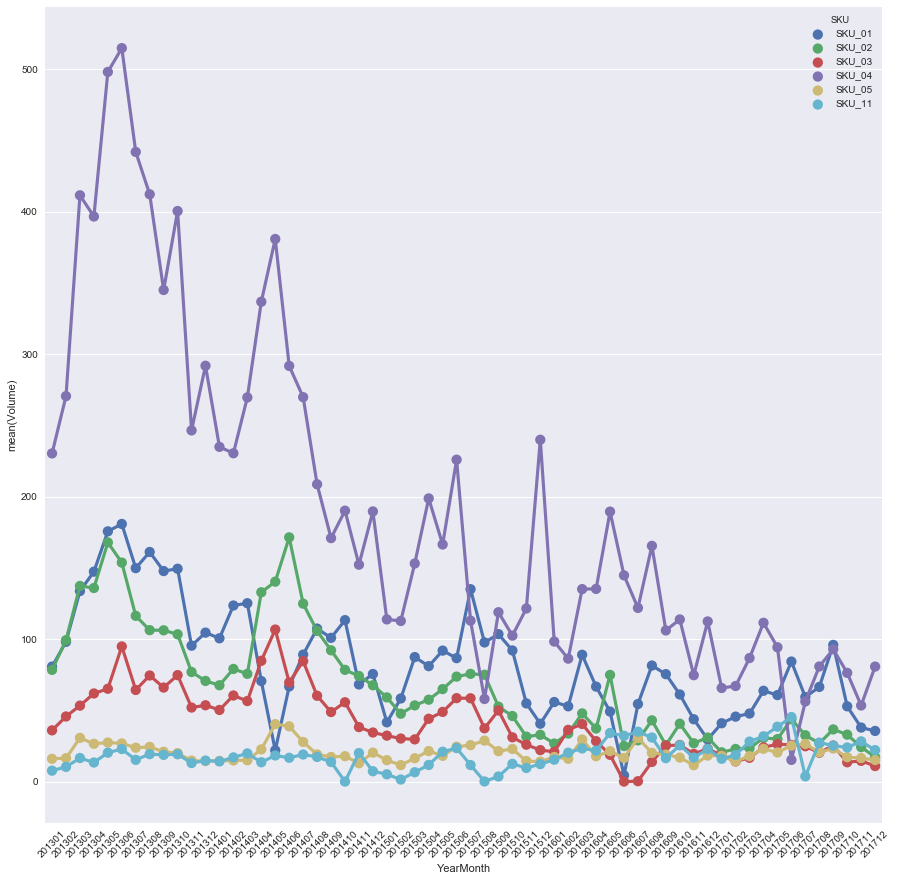

In [39]:
# sales trend for different SKUs of Agency 1
fig, axs = plt.subplots(ncols = 1, figsize=(15, 15))
sns.pointplot(x="YearMonth", y="Volume", hue="SKU", data=df[df['Agency'] == 'Agency_01'], ci = None,
           ax = axs)
plt.xticks(rotation=45)

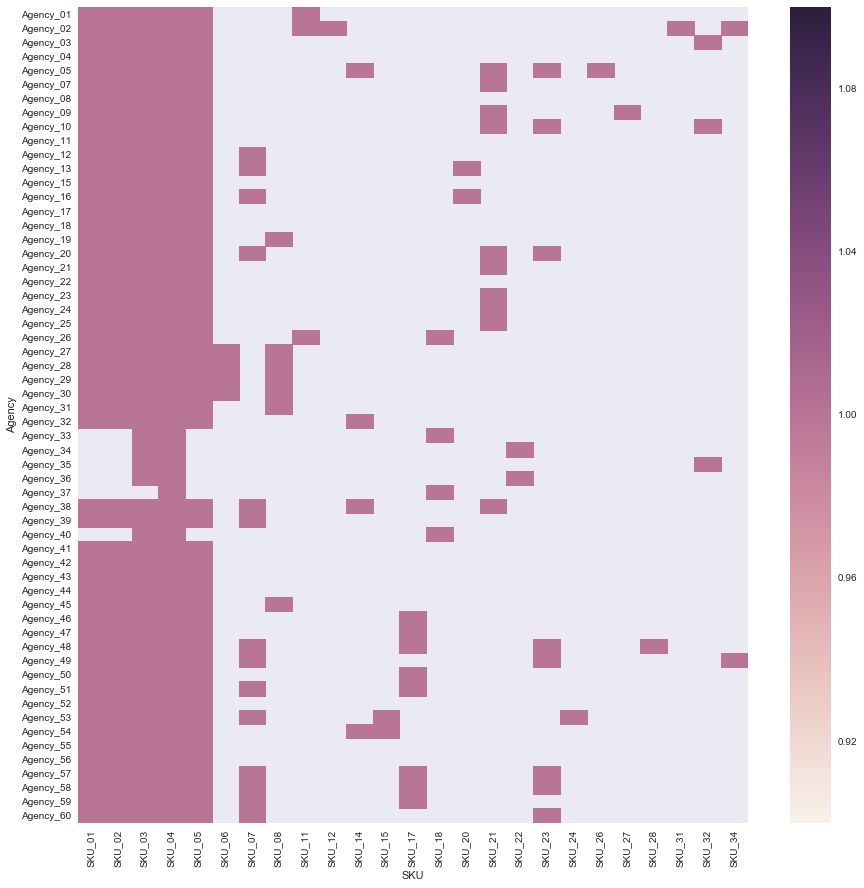

In [42]:
# get a heatmap showing the different SKU's available across different agencies
df_temp =  df.groupby(['Agency', 'SKU']).count()['Volume'].reset_index()
df_temp['Volume'] = 1

fig, axs = plt.subplots(ncols = 1, figsize=(15, 15))
sns.heatmap(df_temp.pivot("Agency", "SKU", "Volume"))

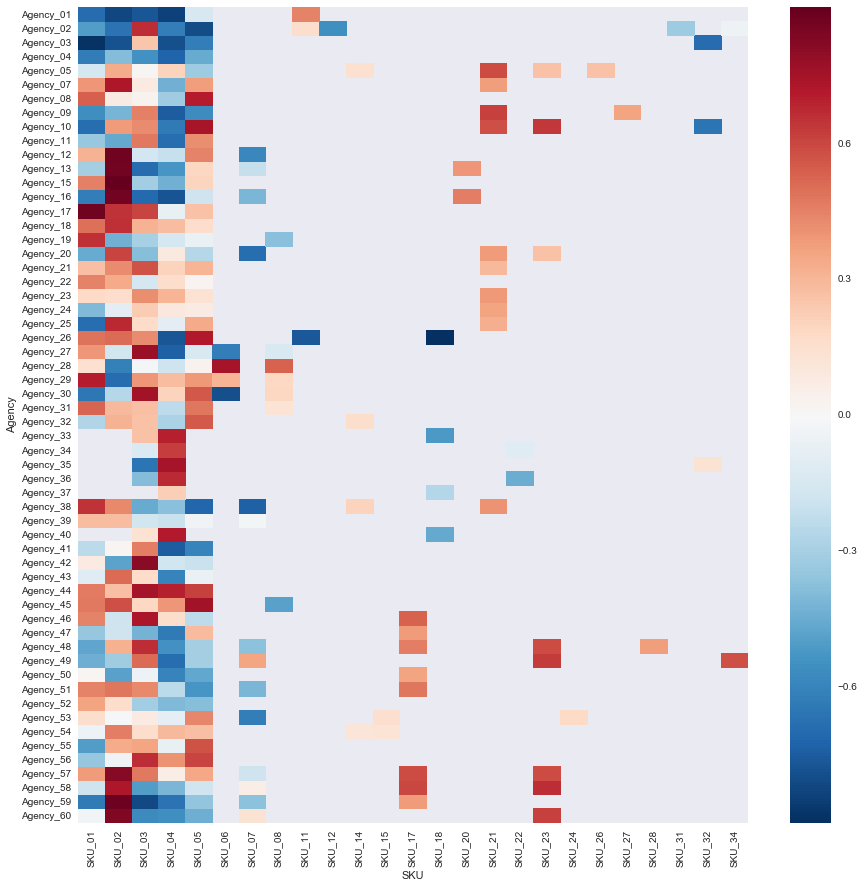

In [57]:
# plot the correlation coefficient between the volume and time for different agencies X SKU's
df_temp =  df.groupby(['Agency', 'SKU']).count()['Volume'].reset_index()
df_temp['Volume'] = 1

for i in range(len(df_temp)):
    agency = df_temp.iloc[i, 0]
    sku    = df_temp.iloc[i, 1]
    l1 = df.loc[(df['Agency'] == agency) & (df['SKU'] == sku), 'Volume'].values
    l2 = df.loc[(df['Agency'] == agency) & (df['SKU'] == sku), 'YearMonth'].values
    df_temp.iloc[i, 2] = np.corrcoef(l1, l2)[0][1]
    
fig, axs = plt.subplots(ncols = 1, figsize=(15, 15))
sns.heatmap(df_temp.pivot("Agency", "SKU", "Volume"))

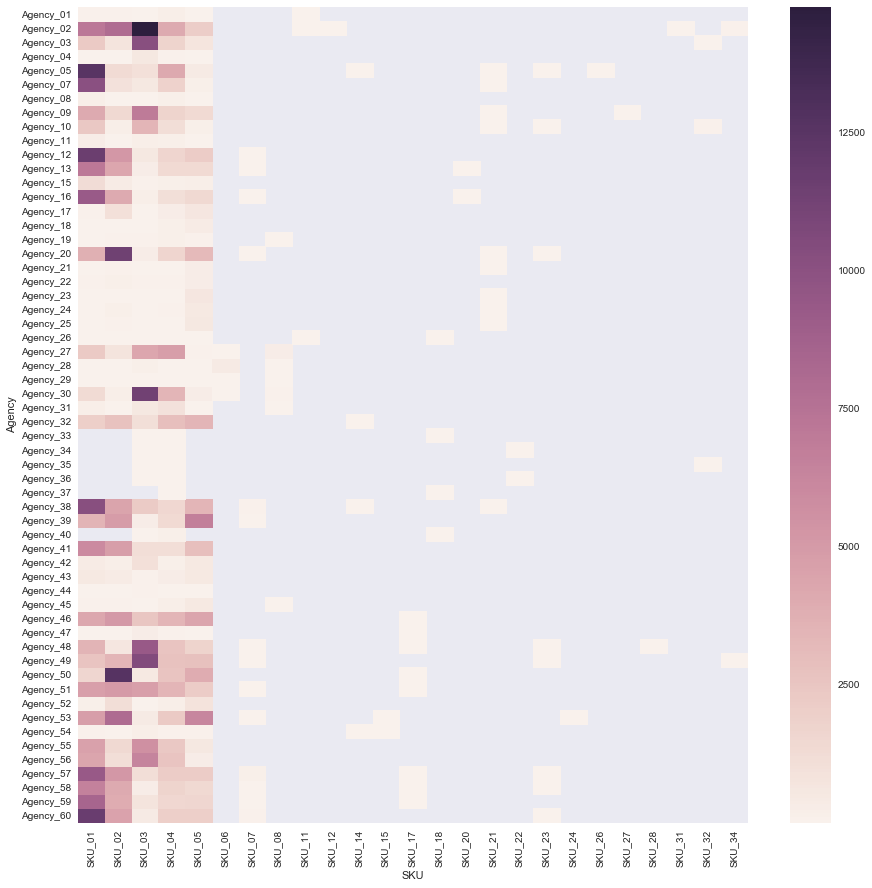

In [58]:
# plot the average yearly volumes for different agencies X SKU's
df_temp =  df.groupby(['Agency', 'SKU']).count()['Volume'].reset_index()
df_temp['Volume'] = 1

for i in range(len(df_temp)):
    agency = df_temp.iloc[i, 0]
    sku    = df_temp.iloc[i, 1]
    l1 = df.loc[(df['Agency'] == agency) & (df['SKU'] == sku), 'Volume'].values
    df_temp.iloc[i, 2] = np.mean(l1)
    
fig, axs = plt.subplots(ncols = 1, figsize=(15, 15))
sns.heatmap(df_temp.pivot("Agency", "SKU", "Volume"))

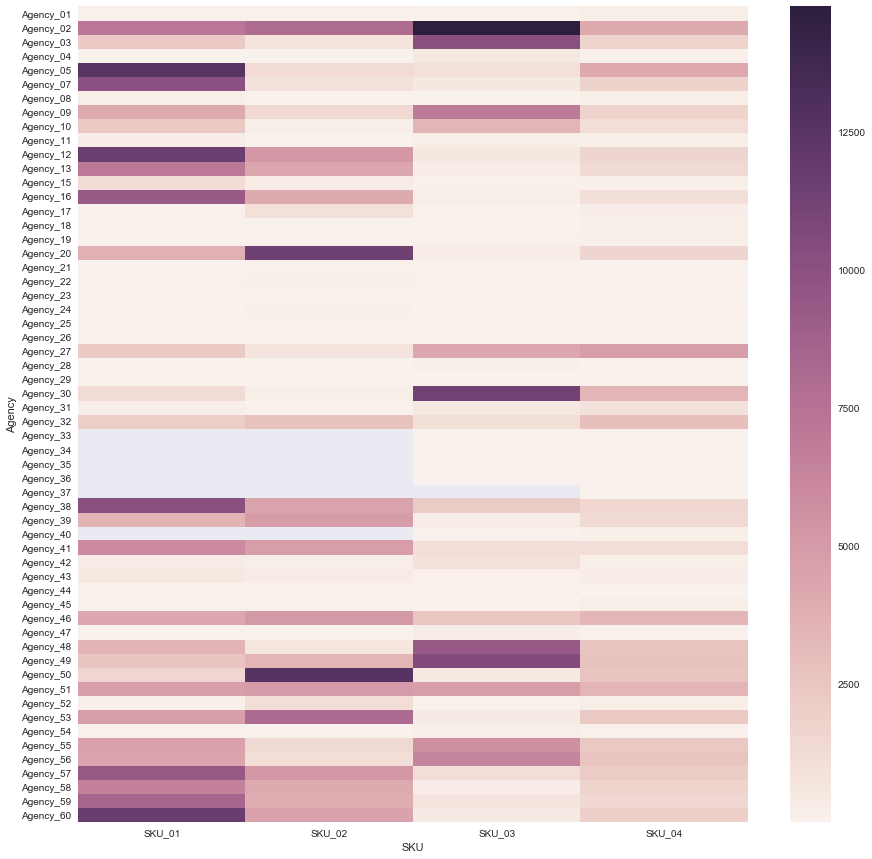

In [60]:
# the average sales for SKU 1 to 5 look very different compared to the others
# plot them separately to understand the ranges
# plot the average yearly volumes for different agencies X SKU's
df_temp =  df.groupby(['Agency', 'SKU']).count()['Volume'].reset_index()
df_temp['Volume'] = 1
df_temp = df_temp.loc[df_temp['SKU'].isin(['SKU_01', 'SKU_02', 'SKU_03', 'SKU_04'])]

for i in range(len(df_temp)):
    agency = df_temp.iloc[i, 0]
    sku    = df_temp.iloc[i, 1]
    l1 = df.loc[(df['Agency'] == agency) & (df['SKU'] == sku), 'Volume'].values
    df_temp.iloc[i, 2] = np.mean(l1)
    
fig, axs = plt.subplots(ncols = 1, figsize=(15, 15))
sns.heatmap(df_temp.pivot("Agency", "SKU", "Volume"))

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5]),
 <a list of 20 Text xticklabel objects>)

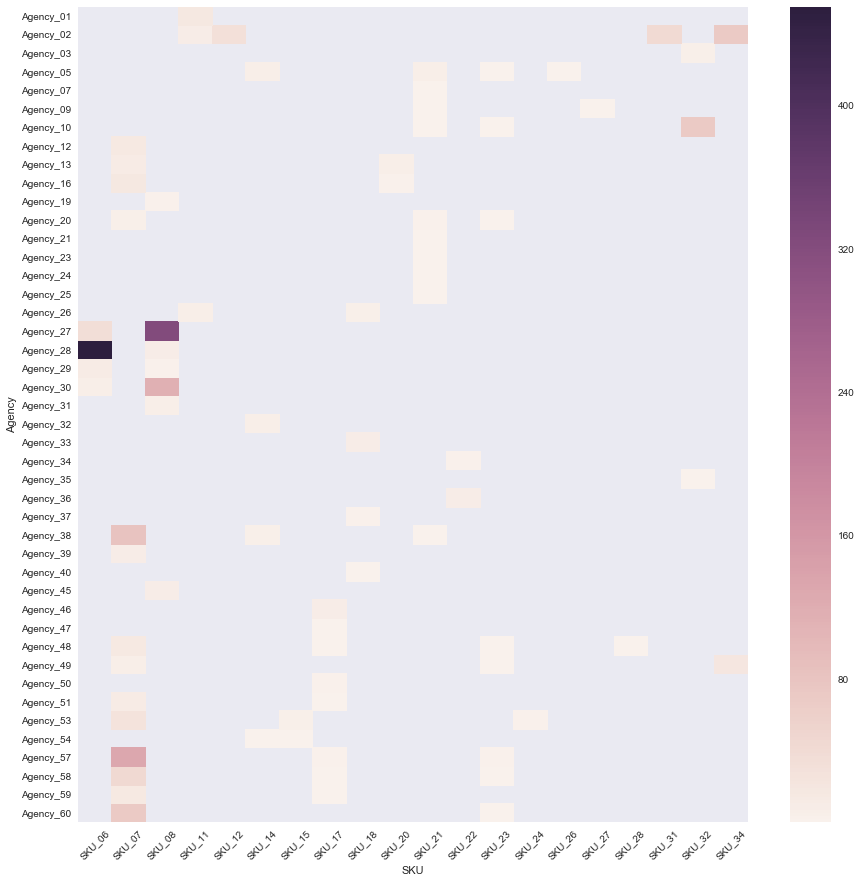

In [64]:
# the average sales for SKU 1 to 5 look very different compared to the others
# plot them separately to understand the ranges
# plot the average yearly volumes for different agencies X SKU's
df_temp =  df.groupby(['Agency', 'SKU']).count()['Volume'].reset_index()
df_temp['Volume'] = 1
df_temp = df_temp.loc[~df_temp['SKU'].isin(['SKU_01', 'SKU_02', 'SKU_03', 'SKU_04', 'SKU_05'])]

for i in range(len(df_temp)):
    agency = df_temp.iloc[i, 0]
    sku    = df_temp.iloc[i, 1]
    l1 = df.loc[(df['Agency'] == agency) & (df['SKU'] == sku), 'Volume'].values
    df_temp.iloc[i, 2] = np.mean(l1)
    
fig, axs = plt.subplots(ncols = 1, figsize=(15, 15))
sns.heatmap(df_temp.pivot("Agency", "SKU", "Volume"))
plt.xticks(rotation=45)

In [74]:
# study the max, min and average year over year for the different SKUs
sku_list = []
for sku in np.sort(df['SKU'].unique().tolist()):
    str_to_prnt = [sku]
    for i in [7]:
        df_temp = df.loc[(df['SKU'] == sku) & (df['YearMonth']//100 == 2010 + i), 'Volume']
        str_to_prnt.append(round(np.sum(df_temp), 2))
        str_to_prnt.append(round(np.mean(df_temp), 2))
    sku_list.append(str_to_prnt)
print (pd.DataFrame(sku_list).sort_values(by = 2))

         0           1        2
18  SKU_24        5.44     0.45
11  SKU_15       19.19     0.80
21  SKU_28       10.13     0.84
10  SKU_14       70.61     1.47
16  SKU_22       48.44     2.02
20  SKU_27       25.02     2.08
17  SKU_23      210.87     2.20
13  SKU_18      122.29     2.55
12  SKU_17      362.41     3.78
15  SKU_21      498.39     4.15
19  SKU_26       51.12     4.26
14  SKU_20      114.87     4.79
23  SKU_32      172.70     4.80
8   SKU_11      407.94    11.33
9   SKU_12      214.05    17.84
6   SKU_07     4237.38    25.22
22  SKU_31      443.38    36.95
24  SKU_34     1342.10    55.92
7   SKU_08     4932.67    58.72
5   SKU_06     9085.28   189.28
3   SKU_04   750001.94  1077.59
4   SKU_05   793359.60  1271.41
2   SKU_03  1451140.33  2121.55
1   SKU_02  1514771.83  2427.52
0   SKU_01  1866208.01  2990.72


In [75]:
# study the max, min and average year over year for the different Agencies
sku_list = []
for sku in np.sort(df['Agency'].unique().tolist()):
    str_to_prnt = [sku]
    for i in [7]:
        df_temp = df.loc[(df['Agency'] == sku) & (df['YearMonth']//100 == 2010 + i), 'Volume']
        str_to_prnt.append(round(np.sum(df_temp), 2))
        str_to_prnt.append(round(np.mean(df_temp), 2))
    sku_list.append(str_to_prnt)
print (pd.DataFrame(sku_list).sort_values(by = 2))

            0          1        2
23  Agency_26     106.19     1.26
32  Agency_35     164.71     4.58
33  Agency_36     244.23     6.78
31  Agency_34     269.14     7.48
34  Agency_37     207.25     8.64
26  Agency_29    1156.83    13.77
30  Agency_33     587.12    16.31
0   Agency_01    2693.76    37.41
44  Agency_47    3352.85    46.57
41  Agency_44    3189.28    53.15
16  Agency_19    4484.93    62.29
6   Agency_08    4777.07    79.62
51  Agency_54    6927.83    82.47
18  Agency_21    6605.24    91.74
3   Agency_04    6208.45   103.47
9   Agency_11    6950.96   115.85
21  Agency_24    8592.98   119.35
25  Agency_28   10628.41   126.53
22  Agency_25    9927.51   137.88
20  Agency_23   10478.12   145.53
19  Agency_22    8809.81   146.83
15  Agency_18    9167.66   152.79
42  Agency_45   13160.46   182.78
37  Agency_40    7223.14   200.64
28  Agency_31   21169.17   294.02
40  Agency_43   19327.95   322.13
14  Agency_17   27398.35   456.64
49  Agency_52   28793.55   479.89
12  Agency_15 

In [25]:
# study the temperature variations of different agencies to
# check if some agencies could be lying in similar regions
print (len(df_weather))
print (df_weather.head(5))

3600
   YearMonth     Agency  Avg_Max_Temp
0     201301  Agency_01        17.072
1     201302  Agency_01        19.984
2     201303  Agency_01        24.600
3     201304  Agency_01        27.532
4     201305  Agency_01        29.396


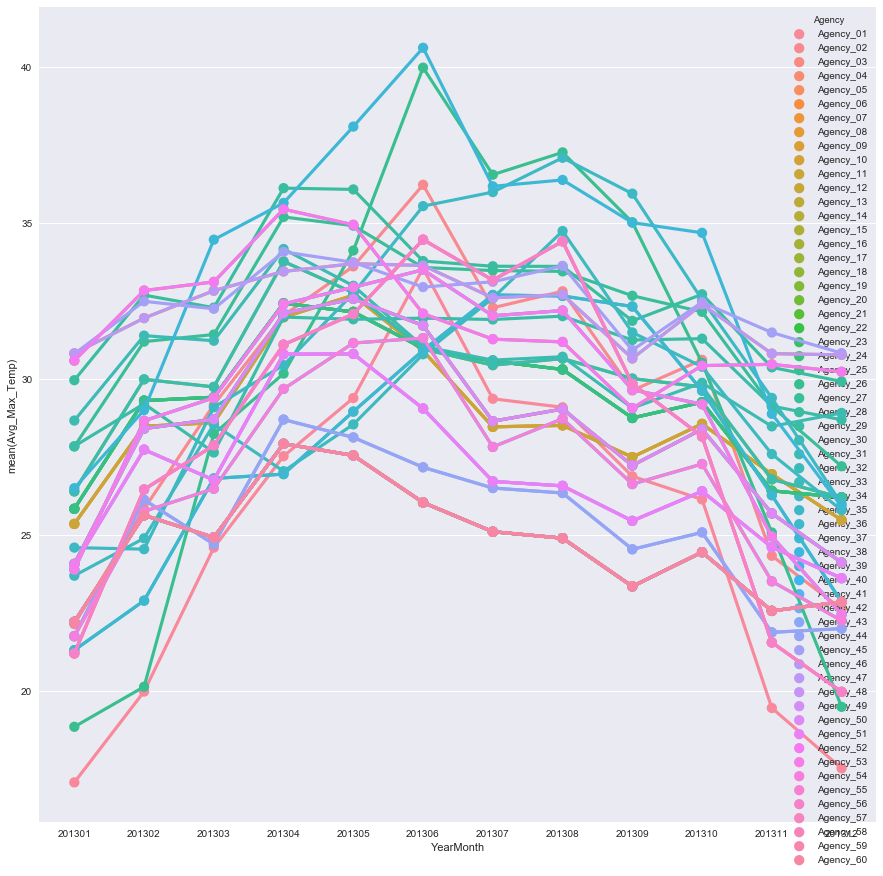

In [35]:
fig, axs = plt.subplots(ncols = 1, figsize=(15, 15))
sns.pointplot(x="YearMonth", y="Avg_Max_Temp", hue="Agency", data=df_weather[df_weather['YearMonth'] <= 201400], ci = None,
           ax = axs)